# Intro

## Classification

To attempt classification, one method is to use linear regression and map all predictions greater than 0.5 as a 1 and all less than 0.5 as a 0. However, this method doesn't work well because classification is not actually a linear function.

The classification problem is just like the regression problem, except that the values we now want to predict take on only a small number of discrete values. For now, we will focus on the **binary classification problem** in which $y$ can take on only two values, $0$ and $1$. (Most of what we say here will also generalize to the multiple-class case.) 

For instance, if we are trying to build a spam classifier for email, then $x(i)$ may be some features of a piece of email, and $y$ may be $1$ if it is a piece of spam mail, and $0$ otherwise. 

Hence, $y\in\{0,1\}$. **$0$ is also called the negative class**, and **$1$ the positive class**, and they are sometimes also denoted by the symbols **“-” and “+.”** Given $x(i)$, the corresponding $y(i)$ is also called the label for the training example.

## Hypothesis Representation

We could approach the classification problem ignoring the fact that y is discrete-valued, and use our old linear regression algorithm to try to predict y given x.

However, it is easy to construct examples where this method performs very poorly. Intuitively, it also doesn’t make sense for $h_{\theta}(x)$ to take values larger than 1 or smaller than 0 when we know that $y \in \{0, 1\}$.

To fix this, let’s change the form for our hypotheses $h_{\theta}(x)$ to satisfy $0 ≤ h_{\theta}(x) ≤ 1$. This is accomplished by plugging $\theta^{T}x$ into the Logistic Function.

Our new form uses the "Sigmoid Function," also called the "Logistic Function":

$$
\begin{align*}& h_\theta (x) = g ( \theta^T x ) \newline \newline& z = \theta^T x \newline& g(z) = \dfrac{1}{1 + e^{-z}}\end{align*}
$$

The following image shows us what the sigmoid function looks like:

![](img/20.png)

The function g(z), shown here, maps any real number to the (0, 1) interval, making it useful for transforming an arbitrary-valued function into a function better suited for classification

$h_{\theta}(x)$ will give us the **probability** that our output is 1. For example, $h_{\theta}(x)$ = 0.7 gives us a probability of 70% that our output is 1. Our probability that our prediction is 0 is just the complement of our probability that it is 1 (e.g. if probability that it is 1 is 70%, then the probability that it is 0 is 30%).

$$\begin{align*}& h_\theta(x) = P(y=1 | x ; \theta) = 1 - P(y=0 | x ; \theta) \newline& P(y = 0 | x;\theta) + P(y = 1 | x ; \theta) = 1\end{align*}$$

*Note : ค่าของ $\hat{y}$  คือความน่าจะเป็นที่ output จะเป็น 1 (ไม่ใช่ 0)*

## Decision Boundary

In order to get our discrete 0 or 1 classification, we can translate the output of the hypothesis function as follows:

$$\begin{align*}& h_\theta(x) \geq 0.5 \rightarrow y = 1 \newline& h_\theta(x) < 0.5 \rightarrow y = 0 \newline\end{align*}$$

The way our logistic function $g$ behaves is that when its input is greater than or equal to zero, its output is greater than or equal to 0.5:

$$\begin{align*}& g(z) \geq 0.5 \newline& when \; z \geq 0\end{align*}$$

Remember.

$$
\begin{align*}z=0, e^{0}=1 \Rightarrow g(z)=1/2\newline z \to \infty, e^{-\infty} \to 0 \Rightarrow g(z)=1 \newline z \to -\infty, e^{\infty}\to \infty \Rightarrow g(z)=0 \end{align*}
$$

So if our input to $g$ is $\theta^{T}X$, then that means:

$$\begin{align*}& h_\theta(x) = g(\theta^T x) \geq 0.5 \newline& when \; \theta^T x \geq 0\end{align*}$$

From these statements we can now say:

$$\begin{align*}& \theta^T x \geq 0 \Rightarrow y = 1 \newline& \theta^T x < 0 \Rightarrow y = 0 \newline\end{align*}$$

The **decision boundary** is the line that separates the area where y = 0 and where y = 1. It is **created by our hypothesis function.**

#### Example:
ถ้า $h_{\theta}(x) = g(\theta_0 + \theta_1x_1 + \theta_2x_2)$

เมื่อ $\theta = \begin{bmatrix}5 \newline -1 \newline 0\end{bmatrix}$
จะได้ว่า
$$\begin{align*} & y = 1 \; ถ้า \; 5 + (-1) x_1 + 0 x_2 \geq 0 \newline & 5 - x_1 \geq 0 \newline & - x_1 \geq -5 \newline& x_1 \leq 5 \newline \end{align*}$$

In this case, our decision boundary is a straight vertical line placed on the graph where $x_1=5$, and everything to the left of that denotes $y = 1$, while everything to the right denotes $y = 0$.

Again, the input to the sigmoid function $g(z)$ (e.g. $\theta^{T}X$) doesn't need to be linear, and could be a function that describes a circle (e.g. $z=\theta_0+\theta_1x^2_1+\theta_2x^2_2$) or any shape to fit our data.



# Logistic Regression Model

## Cost Function
We cannot use the same cost function that we use for linear regression because the Logistic Function will cause the output to be wavy, causing many local optima. In other words, it will not be a convex function.

![](img/22.jpg)

Logistic Function : $h_{\theta}(x) = \frac{1}{1+e^{-\theta^{T}x}}$ เป็นฟังก์ชั่นที่มีลักษณะดังรูปข้างบน ซึ่งมีจุด Local Optima หลายจุด (เป็น Non-Convex function) แล้วด้วยลักษณะแบบนี้จะทำให้ ไม่สามารถใช้ Gradient Descent ซึ่งเป็น Algorithm สำหรับใช้หาจุด Global Minimun ของ Convex Function ได้

![](img/21.jpg)
*ตัวอย่าง Non-Convex Function*

ดังนั้นจึงต้องหา Cost Function ของ Logistic Regression Model ในรูปของ Convex Function ซะก่อน

สำหรับ Linear Regression มี Cost Function คือ 

$$J(\theta) = \dfrac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})^2$$

ขอเรียกก้อน $(h_\theta(x^{(i)})-y^{(i)})^2$ ว่า $\text{Cost}(h_\theta(x^{(i)}),y^{(i)})$ ซึ่งสะท้อนถึงปริมาณความต่างระหว่างค่าจริงกับค่า predict 

Instead, our cost function for logistic regression looks like:

$$\begin{align*}& J(\theta) = \dfrac{1}{m} \sum_{i=1}^m \mathrm{Cost}(h_\theta(x^{(i)}),y^{(i)}) \newline & \mathrm{Cost}(h_\theta(x),y) = -\log(h_\theta(x)) \; & \text{if y = 1} \newline & \mathrm{Cost}(h_\theta(x),y) = -\log(1-h_\theta(x)) \; & \text{if y = 0}\end{align*}$$

> Writing the cost function in this way guarantees that $J(\theta)$ is **convex for logistic regression**.

When $y = 1$, we get the following plot for $J(\theta)$ vs $h_{\theta}(x)$ :

![](img/23.png)

เมื่อ $y = 1$ (ค่าจริง = 1) ยิ่ง $\hat{y}$ (ค่า predict) เข้าใกล้ 1 มากเท่าไหร่ Cost ยิ่งน้อย

Similarly, when $y = 0$, we get the following plot for $J(\theta)$ vs $h_{\theta}(x)$ :

![](img/24.png)

กลับกัน เมื่อ $y = 0$ (ค่าจริง = 0) ยิ่ง $\hat{y}$ (ค่า predict) เข้าใกล้ 0 มากเท่าไหร่ Cost ยิ่งน้อย แต่จะมากขึ้นเรื่อยๆเข้าหา infinity เมื่อทำนายเป็น 1  

**สรุป**
$$
\begin{align*}& \mathrm{Cost}(h_\theta(x),y) = 0 \text{ if } h_\theta(x) = y \newline & \mathrm{Cost}(h_\theta(x),y) \rightarrow \infty \text{ if } y = 0 \; \mathrm{and} \; h_\theta(x) \rightarrow 1 \newline & \mathrm{Cost}(h_\theta(x),y) \rightarrow \infty \text{ if } y = 1 \; \mathrm{and} \; h_\theta(x) \rightarrow 0 \newline \end{align*}
$$

If our correct answer 'y' is 0, then the cost function will be 0 if our hypothesis function also outputs 0. If our hypothesis approaches 1, then the cost function will approach infinity.

If our correct answer 'y' is 1, then the cost function will be 0 if our hypothesis function outputs 1. If our hypothesis approaches 0, then the cost function will approach infinity.

Note that writing the cost function in this way guarantees that $J(\theta)$ is **convex for logistic regression**.

## Simplified Cost Function and Gradient Descent

$$\begin{align*}& J(\theta) = \dfrac{1}{m} \sum_{i=1}^m \mathrm{Cost}(h_\theta(x^{(i)}),y^{(i)}) \newline & \mathrm{Cost}(h_\theta(x),y) = -\log(h_\theta(x)) \; & \text{if y = 1} \newline & \mathrm{Cost}(h_\theta(x),y) = -\log(1-h_\theta(x)) \; & \text{if y = 0}\end{align*}$$

We can compress our cost function's two conditional cases into one case:

$$\mathrm{Cost}(h_\theta(x),y) = - y \; \log(h_\theta(x)) - (1 - y) \log(1 - h_\theta(x))$$

Notice that when $y$ is equal to 1, then the second term $(1−y)\text{log}(1−h_{\theta}(x))$ will be zero and will not affect the result. If $y$ is equal to $0$, then the first term $−y\text{log}(h_{\theta}(x))$ will be zero and will not affect the result.

We can fully write out our entire cost function as follows:

#### สมการนี้ได้มาจากกระบวนการทาง Statistics ใช้วิธี Maximum Likelihood Estimation หา Cost Function ได้
$J(\theta) = - \frac{1}{m} \displaystyle \sum_{i=1}^m [y^{(i)}\log (h_\theta (x^{(i)})) + (1 - y^{(i)})\log (1 - h_\theta(x^{(i)}))]$

A vectorized implementation is:

$\begin{align*} & h = g(X\theta)\newline & J(\theta) = \frac{1}{m} \cdot \left(-y^{T}\log(h)-(1-y)^{T}\log(1-h)\right) \end{align*}$

### Gradient Descent

Remember that the general form of gradient descent is:

$\begin{align*}& Repeat \; \lbrace \newline & \; \theta_j := \theta_j - \alpha \dfrac{\partial}{\partial \theta_j}J(\theta) \newline & \rbrace\end{align*}$

We can work out the derivative part using calculus to get:

$\begin{align*} & Repeat \; \lbrace \newline & \; \theta_j := \theta_j - \frac{\alpha}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \newline & \rbrace \end{align*}$

Notice that this algorithm is identical to the **one we used in linear regression**. We still have to simultaneously update all values in theta.

A vectorized implementation is:

$$\theta := \theta - \frac{\alpha}{m} X^{T} (g(X \theta ) - \vec{y})$$

## Advanced Optimization

- "Conjugate gradient" 
- "BFGS"
- "L-BFGS" 

**are more sophisticated, faster ways to optimize $\theta$ that can be used instead of gradient descent**. We suggest that you should not write these more sophisticated algorithms yourself (unless you are an expert in numerical computing) but use the libraries instead, as they're already tested and highly optimized. Octave provides them.

We first need to provide a function that evaluates the following two functions for a given input value $\theta$:

$\begin{align*} & J(\theta) \newline & \dfrac{\partial}{\partial \theta_j}J(\theta)\end{align*}$

We can write a single function that returns both of these:

`
function [jVal, gradient] = costFunction(theta)
  jVal = [...code to compute J(theta)...];
  gradient = [...code to compute derivative of J(theta)...];
end
`

Then we can use octave's "fminunc()" optimization algorithm along with the "optimset()" function that creates an object containing the options we want to send to "fminunc()".

`
options = optimset('GradObj', 'on', 'MaxIter', 100);
initialTheta = zeros(2,1);
   [optTheta, functionVal, exitFlag] = fminunc(@costFunction, initialTheta, options);
`

We give to the function "fminunc()" our cost function, our initial vector of theta values, and the "options" object that we created beforehand.

สรุปคือ เราอาจใช้ Optimization Algorithm อื่นๆที่มี function สำเร็จรูปให้ใช้อยู่แล้วในการค่าพารามิเตอร์ ซึ่งให้ผลไวกว่า GD แต่ต้องลองฝึกใช้ดู อาจต้องอ่าน Math เพิ่มเพื่อ debug ฟังก์ชั่นได้

# Multiclass Classification

## Multiclass Classification: One-vs-all

Now we will approach the classification of data when we have **more than two categories**. Instead of $y = {0,1}$ we will expand our definition so that $y = {0,1...n}$.

Since y = {0,1...n}, we divide our problem into n+1 (+1 because the index starts at 0) binary classification problems; in each one, **we predict the probability that 'y' is a member of one of our classes.**

$\begin{align*}& y \in \lbrace0, 1 ... n\rbrace \newline& h_\theta^{(0)}(x) = P(y = 0 | x ; \theta) \newline& h_\theta^{(1)}(x) = P(y = 1 | x ; \theta) \newline& \cdots \newline& h_\theta^{(n)}(x) = P(y = n | x ; \theta) \newline& \mathrm{prediction} = \max_i( h_\theta ^{(i)}(x) )\newline\end{align*}$

(ถ้ามี $y = {0,1...n}$ ก็แบ่งคิดแบบ binary ทีละตัว หาความน่าจะเป็นของโอกาสที่น่าจะเกิด เหตุการณ์ $y=i$ พอได้ x ตัวใหม่มาแล้วจะ predict ว่าอยู่ใน class ไหน ก็ลองแทน x ไปใน $h_{\theta}(x)$ ทุกค่าดู แล้วดูว่า $h_{\theta}(x)$ ไหนมีค่ามากสุด ก็จะบอกได้ว่า x อยู่ในกลุ่มใด)

We are basically choosing one class and then lumping all the others into a single second class. We do this repeatedly, applying binary logistic regression to each case, and then use the hypothesis that returned the highest value as our prediction.

The following image shows how one could classify 3 classes:

![](img/25.png)

#### To summarize:

Train a logistic regression classifier $h_{\theta}(x)$ for each class￼ to predict the probability that ￼ ￼$y = i$￼￼.

To make a prediction on a new $x$, pick the class ￼that maximizes $h_{\theta}(x)$

# ====================== CODE =========================

### ตัวอย่างข้อมูลสำหรับ  Logistic Regression with One Variable

มี independence variable 2 ตัว (x1,x2) และ dependence variable 1 ตัว (y)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data1 = pd.read_csv('programing/machine-learning-ex2/ex2/ex2data1.txt',names=['Exam 1 score','Exam 2 score','Admitted'])
data1.head()

,Exam 1 score,Exam 2 score,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


ก่อนจะเริ่มทำอะไร ลอง visualize data ออกมาดูก่อนว่าเป็นยังไง จะได้ (ความสัมพันธ์ระหว่าง exam 1 score, exam 2 score และ การผ่าน)

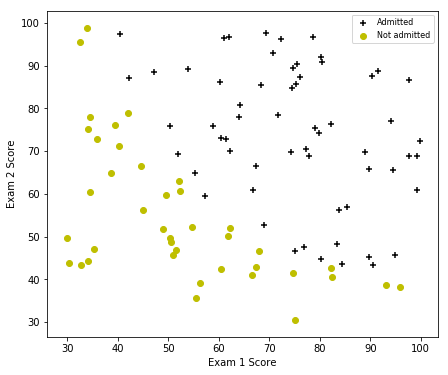

In [2]:
grp = data1.groupby('Admitted')
admitted_data = grp.get_group(1)
not_admitted_data = grp.get_group(0)

plt.figure(figsize=(7,6))

admitted     = plt.scatter(admitted_data.values[:,0], admitted_data.values[:,1], marker='+', color='black')
not_admitted = plt.scatter(not_admitted_data.values[:,0], not_admitted_data.values[:,1], marker='o', color='y')

plt.legend((admitted, not_admitted),('Admitted', 'Not admitted'),scatterpoints=1,loc='upper right',ncol=1,fontsize=8)
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.show()

จะเห็นว่า output ปลายทางคือ ผ่าน(1)-ไม่ผ่าน(0) แค่ 2 อย่างเท่านั้นจาก input คือ ex-score1 และ ex-score2 หากเราอยากจะทำนายผลการผ่าน/ไม่ผ่านจากคะแนน ex-score1 และ ex-score2 ของข้อมูลใหม่ในอนาคต การใช้ Logistic Regression Model เป็นเครื่องมือ น่าจะเป็น good choice

ดังนั้นต้องเริ่มจาก hypothesis ของ model ก่อน ดังนี้

$h = g(X\theta)$

เมื่อ

$g(z) = \dfrac{1}{1 + e^{-z}} \text{ -----> "sigmoid function"}$ ลู่เข้าสู่ 1 เมื่อ $z >= 0$ ลู่เข้า 0 เมื่อ $z < 0$ 

ดังนั้นเขียน sigmoid function ก่อน จะได้

In [3]:
# Instructions: Compute the sigmoid of each value of z (z is a scalar).
import numpy as np

def sigmoid(z):
    g = 1/(1+np.exp(np.array(-z,dtype=np.float128)))
    return g

ทดสอบ Sigmoid function ที่เราสร้าง

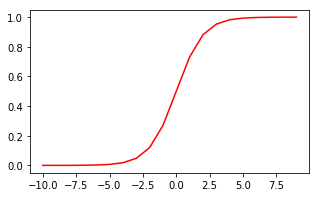

In [4]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(5,3))  
ax.plot(nums, sigmoid(nums), 'r') 
plt.show()

ทีนี้เราจะมี function สำหรับหาค่า $h_{\theta}(x)$ แล้ว (ความน่าจะเป็นที่ $y = 1$) ซึ่งก็คือ Model ที่เราจะใช้อธิบายข้อมูล ว่าอยู่กลุ่ม 0 หรือ กลุ่ม 1 

ทีนี้สิ่งที่เราขาดก็คือ พารามิเตอร์ของ model ($\theta$) ดังนั้นขั้นตอนถัดไปก็คือ การหาพารามิเตอร์ของ model จาก cost function (ฟังก์ชั่นที่ตัวแปรต้นคือ parameter)

### Cost Function 

อันนี้คือ cost function ของ linear regression (least mean square)

$ J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(\hat{y_{i}}−y_{i})^{2} = \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x_{i})−y_{i})^{2} $

#### เมื่อใช้วิธี Maximum Likelihood Estimation หา Cost Function ของ logistic regression จะได้
$J(\theta) = - \frac{1}{m} \displaystyle \sum_{i=1}^m [y^{(i)}\log (h_\theta (x^{(i)})) + (1 - y^{(i)})\log (1 - h_\theta(x^{(i)}))]$

A vectorized implementation is:

$\begin{align*}J(\theta) = \frac{1}{m} \cdot \left(-y^{T}\log(h)-(1-y)^{T}\log(1-h)\right) \end{align*}$

เมื่อ $m$ คือจำนวนจุดทั้งหมด(แถว)ของ dataset ที่เรามี และ $h$ คือ sigmoid function ของ $X\theta$

*Note:log แต่ละ element ใน metric h*

เขียนเป็น function ได้ดังนี้

In [13]:
import numpy as np
# from math import log

def costFunction(theta,X,y):
    # Instructions: Compute the cost of a particular choice of theta.
    #               You should set J to the cost.
    #               Compute the partial derivatives and set grad to the partial
    #               derivatives of the cost w.r.t. each parameter in theta
    # Note: grad should have the same dimensions as theta
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    m = y.shape[1] # number of training examples
    h = np.matrix(sigmoid(X.dot(theta)))
    
    # Cost Function
    J = (1/m)*(-y.dot(np.log(h)) - ((1-y).dot(np.log(1-h)) ) )
    # Partial Derivatives
    grad = (1/m)*X.T.dot(h-y.T)

    return [J,grad]

ทดสอบ function จะได้

In [14]:
# x1 = data1.values[:,0]
# x2 = data1.values[:,1]
Xdata = data1.values[:,0:2]
y = data1.values[:,2]
m = len(Xdata)

# Add intercept term to x and X_test
X = np.hstack( (np.ones([m,1]),Xdata) )
[m,n] = np.shape(X)

# Initialize fitting parameters
initial_theta = np.zeros([n])

# Compute and display initial cost and gradient
[cost, grad] = costFunction(initial_theta, X, y)
print('J = ',cost)
print('Grad = ',grad)


J =  [[ 0.69314718]]
Grad =  [[-0.1]
 [-12.009217]
 [-11.262842]]


เมื่อหา Cost Function ได้แล้ว ทำ GD ต่อ เพื่อหา $\theta$ ที่ทำให้ Cost Function มีค่าน้อยสุด

### Gradient Descent

$\begin{align*}& Repeat \; \lbrace \newline & \; \theta_j := \theta_j - \alpha \dfrac{\partial}{\partial \theta_j}J(\theta) \newline & \rbrace\end{align*}$

สำหรับ Logistic Regression จะได้ 

$\theta := \theta - \frac{\alpha}{m} X^{T} (g(X \theta ) - \vec{y})$

จาก `costFunction` ข้างบน เราหา $\frac{1}{m} X^{T} (g(X \theta ) - \vec{y})$ แล้ว ดังนั้นในฟังก์ชั่นนี้เราจะทำ iteration เพื่อหา $\theta$
ทำเป็น function ได้ดังนี้

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def gradientDescent(X, y, initial_theta, alpha, num_iters):
    J_history = np.zeros(num_iters)
    theta = initial_theta
    n = len(theta)

    for i in range(num_iters):
        [cost, grad] = costFunction(theta, X, y)
        J_history[i] = cost
        theta = theta - alpha*grad
        
    plt.plot(J_history)
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost J')
    plt.show()

    return [theta, J_history]

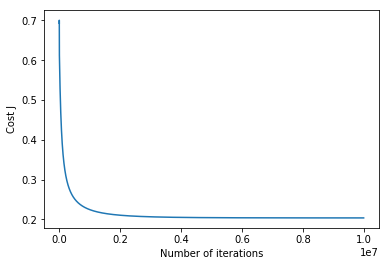

[[-24.749554]
 [ 0.20293811]
 [ 0.19813958]]


In [28]:
[theta, J_history] = gradientDescent(X,y,initial_theta,0.00101,10000000)
print(theta)

จากผลการรันโปรแกรมข้างบนจะเห็นว่า GD มีค่าน้อยเมื่อ $\theta = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \end{bmatrix} = \begin{bmatrix} -24.749554 \\ 0.20293811 \\ 0.19813958 \end{bmatrix}$

## ทดลองหา $\theta$ ด้วยวิธีการอื่น 
เช่น
- "Conjugate gradient" 
- "BFGS"
- "L-BFGS" 

ซึ่งก็มี lib เช่น scipy ช่วยในเรื่องนี้ได้ ตัวอย่าง function 

- `fmin` : Nelder-Mead simplex
- `fmin_bfgs` : BFGS
- `fmin_ncg` : Newton Conjugate Gradient
- `leastsq` : Levenberg-Marquardt
- `fmin_cobyla` : COBYLA

ในที่นี้จะลองหาด้วยวิธี `fminunc` ของ MATLAB เขียนด้วย Python ได้ดังนี้

ก่อนอื่นสร้าง function สำหรับใช้กับ `fmin_tnc(...)` 

In [349]:
def costOnly(theta,X,y):
    theta = np.matrix(theta).T
    X = np.matrix(X)
    y = np.matrix(y)

    m = len(y) # number of training examples
    h = sigmoid(X.dot(theta))
    # Cost Function
    first  = -y.T.dot(np.log(h))
    second = (1-y.T).dot(np.log(1-h))
    J = (1/m)*(first - second)
    return J[0,0]

def gradOnly(theta,X,y):
    theta = np.matrix(theta).T
    X = np.matrix(X)
    y = np.matrix(y)
    m = len(y) # number of training examples
    
    h = sigmoid(X.dot(theta))
    # Partial Derivatives
    grad = (1/m)*(X.T.dot(h-y))
    return grad.tolist()

ทดสอบ `CostOnly` กับ `GradOnly`

In [350]:
# Data
thetax = initial_theta # (3,)
Xx = np.matrix(X) # (100,3)
yx = np.matrix(y).T # (100,1)

Xx.shape, thetax.shape, yx.shape  

((100, 3), (3,), (100, 1))

In [351]:
costOnly(thetax,Xx,yx)

0.69314718055994532385

In [352]:
gradOnly(thetax,Xx,yx)

[[-0.10000000000000000208], [-12.009216589291152159], [-11.262842205513593758]]

ลองใช้กับ `fmin_tnc(...)` 

In [354]:
import scipy.optimize as opt  
result = opt.fmin_tnc(func=costOnly, x0=thetax, fprime=gradOnly, args=(Xx, yx))  
print("Parameter :",result[0])
parameter = result[0]
parameter.shape
costOnly(parameter, Xx, yx)  

Parameter : [-25.16131863   0.20623159   0.20147149]


0.20349770158947457638

จะเห็นว่าวิธีนี้ไวกว่า GD มากๆ 

ค่าจาก GD เมื่อทำ iteration 10 ล้านครั้ง $\theta = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \end{bmatrix} = \begin{bmatrix} -24.749554 \\ 0.20293811 \\ 0.19813958 \end{bmatrix}$ เทียบกับที่ได้จาก `fmin_tnc(...)` คือ $\begin{bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \end{bmatrix} = \begin{bmatrix} -25.16131863 \\ 0.20623159 \\ 0.20147149 \end{bmatrix}$ จะเห็นว่าต่างกันนิดหน่อย แต่คิดว่าถ้าทำ iteration เยอะกว่านี้จะได้ค่าเดียวกัน

จะได้สมการของ Decision Boundary คือ

$$\theta_0 + \theta_1x_1 + \theta_2x_2 = 0$$

แทนค่า

$$-25.16 + 0.206x_1 + 0.201x_2 = 0$$

ลอง plot ดู เตรียม data แปป

In [454]:
exam1 = np.arange(25,105)
exam2 = (25.16131863 - 0.20623159*exam1)/0.20147149

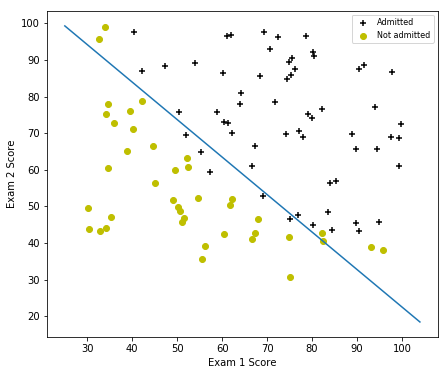

In [455]:
plt.figure(figsize=(7,6))
admitted     = plt.scatter(admitted_data.values[:,0], admitted_data.values[:,1], marker='+', color='black')
not_admitted = plt.scatter(not_admitted_data.values[:,0], not_admitted_data.values[:,1], marker='o', color='y')
decision_boundary = plt.plot(exam1,exam2)

plt.legend((admitted, not_admitted),('Admitted', 'Not admitted'),scatterpoints=1,loc='upper right',ncol=1,fontsize=8)
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.show()

## Predict
เมื่อได้ parameter ของ decision boundary มาแล้ว นำมาทดลองทำนายผลว่าจะเป็น 0 หรือ 1 ดังนี้

$
h_{\theta}(x) = g(z) = \frac{1}{1 + e^{-z}}
$

เมื่อ $z = -25.16 + 0.206x_1 + 0.201x_2$

ถ้า $z>0$ จะได้ว่า $g(z)$ ลู่เข้า 1 ตรงกันข้าม ถ้า $z<0$ จะได้ว่า $g(z)$ ลู่เข้า 0 

In [433]:
def predict(theta, X):  
    z = X.dot(theta)
    predict = z>=0
    return predict

In [434]:
theta_min = np.matrix(parameter).T
predictions = predict(theta_min, X)
correct = (yx == predictions)
accuracy = sum(correct)[0,0]%len(correct)
print('accuracy = {0}%'.format(accuracy))

accuracy = 89%
